$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
 \newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$

# Assignment #4 - Neural Networks

### <font color="red"> DUE: Apr 19 (Thursday) 11:00 pm </font>  

<font color="blue"> ARUN KUNNUMPURAM THOMAS 801027386 </font>

# I. Overview

In this assignment I am doing the classification problem based on marketing campaign dataset using linear logisitic regression (QDA) and non linear logistic regression using neural network. At the end I will compare the results from the above methods.

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Input variables: bank client data: 1 - age (numeric) 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') 5 - default: has credit in default? (categorical: 'no','yes','unknown') 6 - housing: has housing loan? (categorical: 'no','yes','unknown') 7 - loan: has personal loan? (categorical: 'no','yes','unknown') related with the last contact of the current campaign: 8 - contact: contact communication type (categorical: 'cellular','telephone') 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. other attributes: 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 14 - previous: number of contacts performed before this campaign and for this client (numeric) 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') social and economic context attributes 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 19 - euribor3m: euribor 3 month rate - daily indicator (numeric) 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target): 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
dfbank=pd.read_csv("bank-additional-full.csv",sep=";")
dfbank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
dfbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [10]:
dfbank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
dfbank.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [12]:
dfbank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
dfbank.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [14]:
pd.isnull(dfbank)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
np.any(dfbank.isnull())

False

In [16]:
dfbank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [17]:
dfbank['education']=np.where(dfbank['education'] =='basic.9y', 'Basic', dfbank['education'])
dfbank['education']=np.where(dfbank['education'] =='basic.6y', 'Basic', dfbank['education'])
dfbank['education']=np.where(dfbank['education'] =='basic.4y', 'Basic', dfbank['education'])

In [18]:
dfbank['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [19]:
#converting each categoraicals coloumns to numerical values using one hot encoding so that it can be used for classfication in future
cols =['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
data_1 = dfbank[cols]
data_dummies = pd.get_dummies(data_1)
result_dfbank = pd.concat([data_dummies, dfbank], axis=1)
result_dfbank.head()
result_dfbank.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_succe

In [20]:
result_dfbank=result_dfbank.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'],axis=1)
result_dfbank.shape

(41188, 62)

In [21]:
result_dfbank.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_succe

In [132]:
result_dfbank

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,0,0,0,0,0,0,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
1,0,0,0,0,0,0,0,1,0,0,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
2,0,0,0,0,0,0,0,1,0,0,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
3,1,0,0,0,0,0,0,0,0,0,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
4,0,0,0,0,0,0,0,1,0,0,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
5,0,0,0,0,0,0,0,1,0,0,...,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
6,1,0,0,0,0,0,0,0,0,0,...,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
7,0,1,0,0,0,0,0,0,0,0,...,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
8,0,0,0,0,0,0,0,0,0,1,...,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
9,0,0,0,0,0,0,0,1,0,0,...,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1


In [22]:
result_dfbank['y'].unique()

array(['no', 'yes'], dtype=object)

In [23]:
result_dfbank['y'] = result_dfbank['y'].apply(lambda x: 1 if x =='yes' else -1)

In [24]:
result_dfbank['y'].unique()

array([-1,  1], dtype=int64)

In [25]:
data_final_vars=result_dfbank.columns.values.tolist()
yy=['y']
XX=[i for i in data_final_vars if i not in yy]

In [26]:
colsRFE=['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']


In [27]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(result_dfbank[colsRFE],result_dfbank['y'])
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True False False  True False False False
 False False False False  True False False False False False  True False
 False False False False False False False  True False  True  True  True
 False False  True  True  True False False False  True False False False
  True  True  True False False False False  True False False False  True
 False]
[13  1 28 41 38  1 31  6  1 16 15 40  8  9 10 42  1  2 39  3  4  5  1 22
 44 36 17 37 24 21 18  1 20  1  1  1 27 26  1  1  1 32 12 11  1 34 29  7
  1  1  1 35 33 14 43  1 19 23 25  1 30]


In [136]:
result_dfbank

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,0,0,0,0,0,0,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
1,0,0,0,0,0,0,0,1,0,0,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
2,0,0,0,0,0,0,0,1,0,0,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
3,1,0,0,0,0,0,0,0,0,0,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
4,0,0,0,0,0,0,0,1,0,0,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
5,0,0,0,0,0,0,0,1,0,0,...,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
6,1,0,0,0,0,0,0,0,0,0,...,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
7,0,1,0,0,0,0,0,0,0,0,...,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
8,0,0,0,0,0,0,0,0,0,1,...,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1
9,0,0,0,0,0,0,0,1,0,0,...,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,-1


In [32]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success","y"] 
result_dfbankNew=result_dfbank[cols]
result_dfbankNew.shape

(41188, 19)

In [131]:
result_dfbankNew

,previous,euribor3m,job_blue-collar,job_retired,job_services,job_student,default_no,month_aug,month_dec,month_jul,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,0,4.857,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1
1,0,4.857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
2,0,4.857,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,-1
3,0,4.857,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1
4,0,4.857,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,-1
5,0,4.857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
6,0,4.857,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1
7,0,4.857,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
8,0,4.857,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1
9,0,4.857,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,-1


In [33]:
result_dfbankNew['y'].unique()

array([-1,  1], dtype=int64)

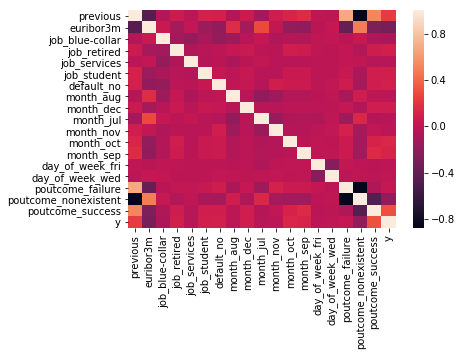

In [34]:
import seaborn as sns
corr = result_dfbankNew.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [35]:
cols=["euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success","y"] 
result_dfbankNew1=result_dfbank[cols]
result_dfbankNew1.shape

(41188, 18)

Visualization of the Data

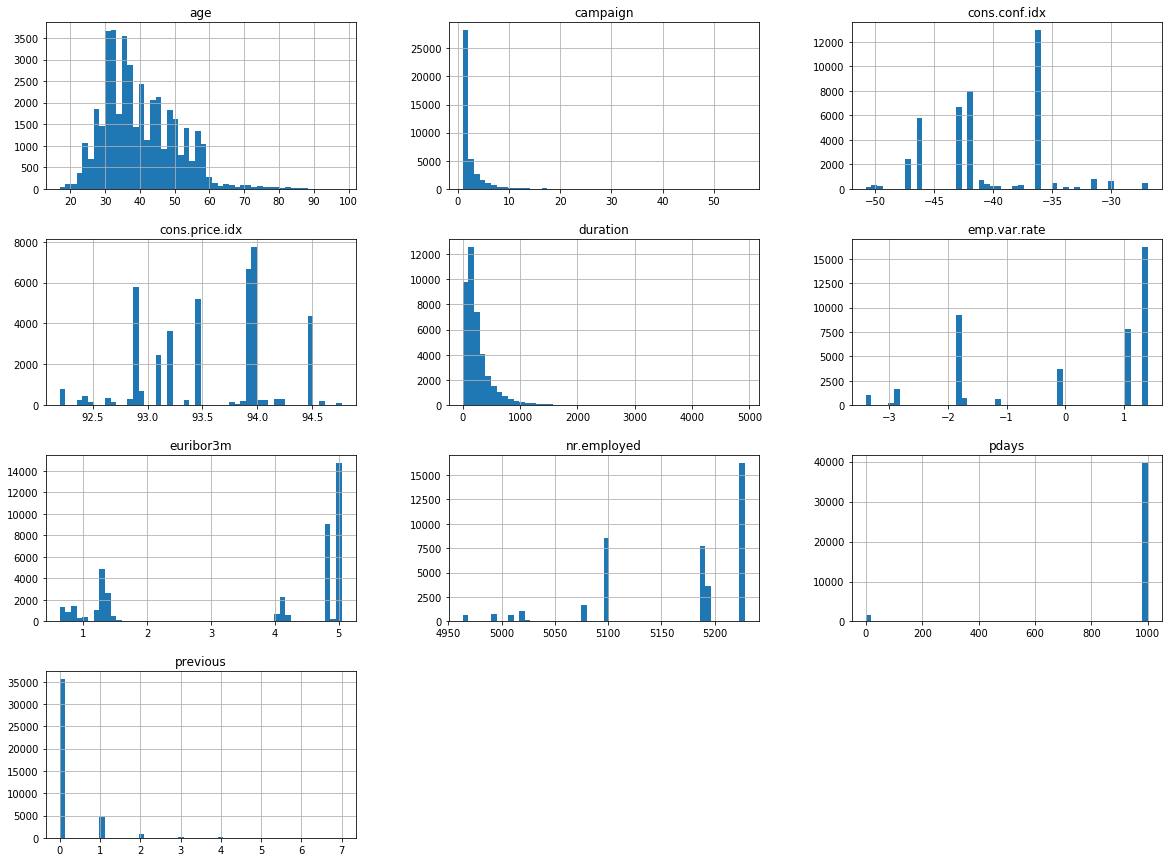

In [36]:
#histogram for continous attributes
dfbank.hist(bins=50, figsize=(20,15))
plt.show()

In [37]:
dfbank['education'].dtype

dtype('O')

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


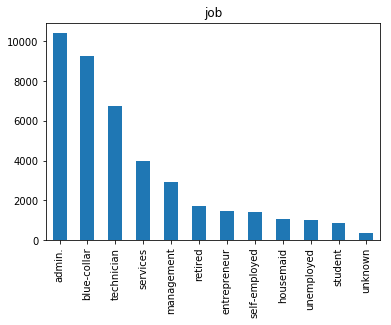

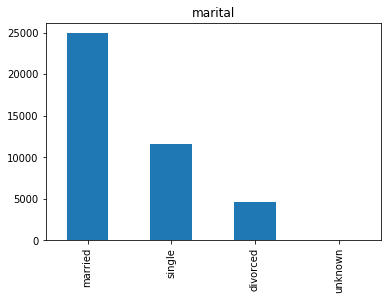

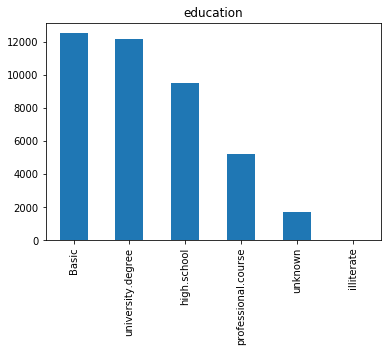

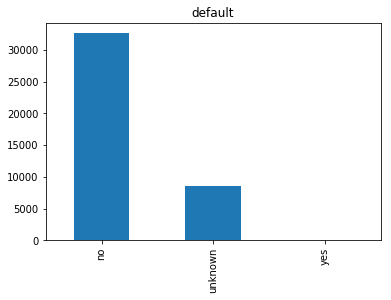

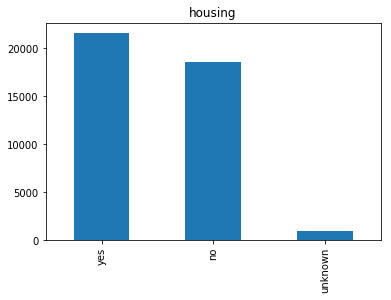

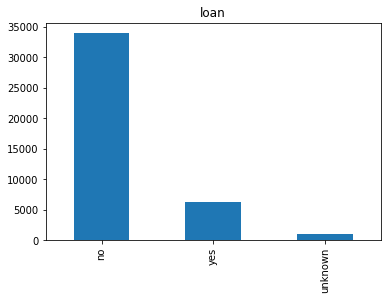

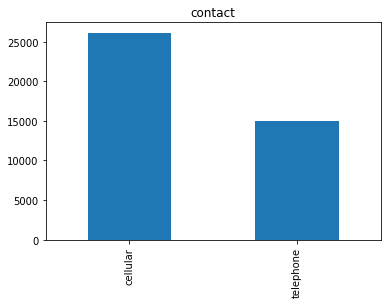

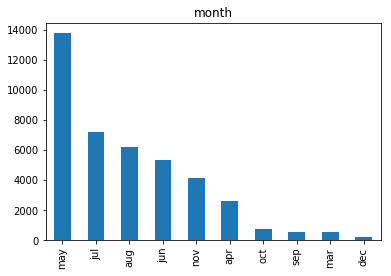

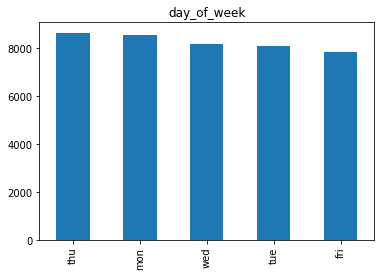

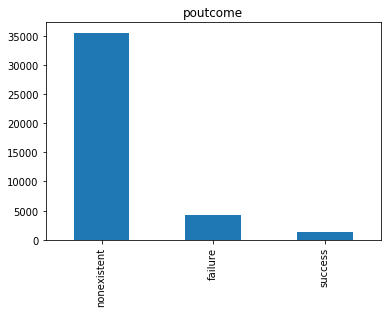

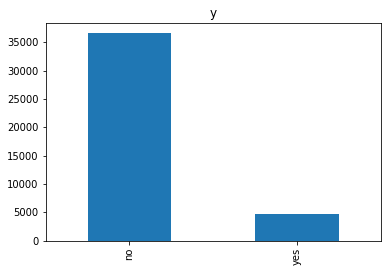

In [38]:
#bar graph for categorical variables
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in dfbank.columns:
    if dfbank[i].dtype is np.dtype('O'):
        print(i)
        plt.subplots(1,1)
        dfbank[i].value_counts().plot(kind='bar',subplots='true')
fig.tight_layout()

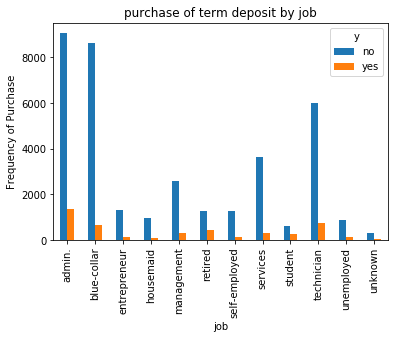

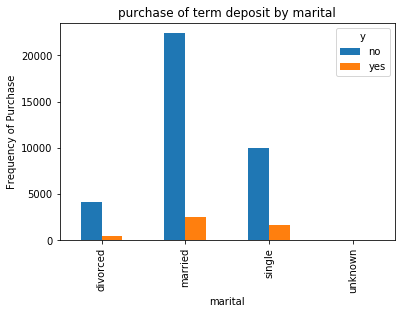

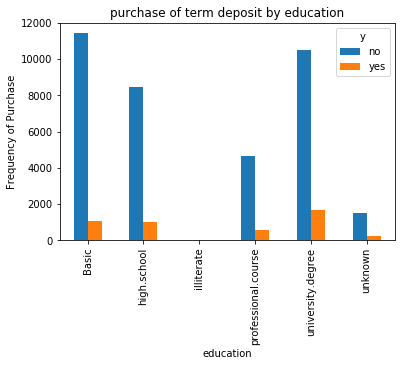

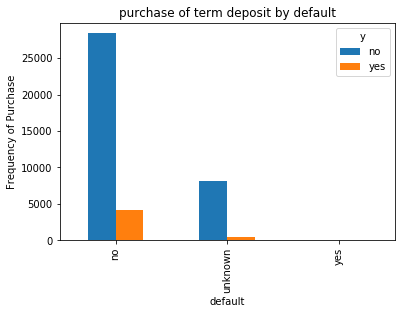

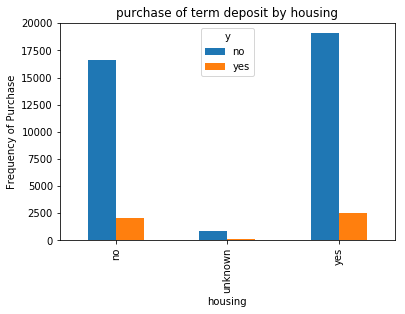

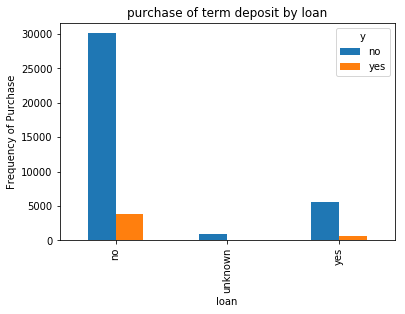

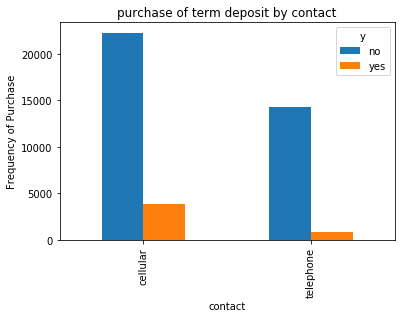

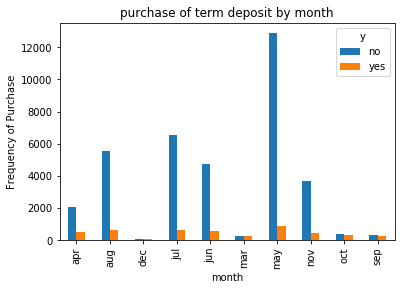

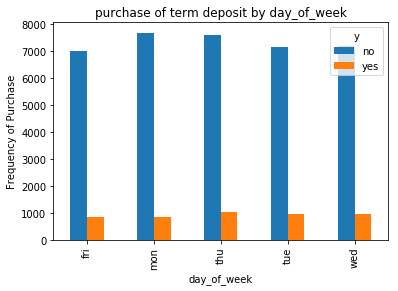

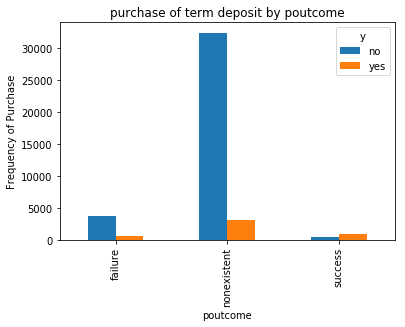

In [39]:
cols =['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
for i in cols:
    pd.crosstab(dfbank[i],dfbank.y).plot(kind='bar')
    plt.title('purchase of term deposit by '+i)
    plt.xlabel(i)
    plt.ylabel('Frequency of Purchase') 

# Analysis of the data

The average age of people who buy term deposit is higher than the Avg age of people who don't buy term deposit. If the campaign (number of contacts performed during this campaign and for this client) is less than more people bought term deposit If the days (number of days that passed by after the client was last contacted from a previous campaign) are less than more people bought term deposit. From the purchase of term deposit by job graph shows the job title can be a good predictor for deciding whether one of the term deposit or not It seems the marital and education also be good predicators for deciding whether one buys term deposit or not. But day of the week is not a predictor for deciding one who will buy term deposit or not. Month will be a good predictor. It seems all categorical variable except day of week will help us to predict the whether a user by term deposit or not






# III. Methods

- Summarize the nonlinear classification model. 
- Inherit the NeuralNet class for regression, implement your own version of Nonlinear Logistic Regression classifier. 
- Explain your codes. 
- Use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy. 

# Summary of Neural Network

Neural networks, or artificial neural networks, are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions (Figure 1), we build or stack multiple neuron-like hidden units to map data into nonlinear space for rich representation.

In perceptron, passing the output of linear model to the step function, we get discrete outputs. Now, you can think a perceptron as a neuron. With a threshold zero, when the linear model outputs are over it, it passes the signal to next neuron.

By connecting the perceptrons, we can actually build synaptic connections. We call this model as multi-layer perceptron (MLP).


<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/perceptron.png" width=600 />

Fitting the data with MLP is a combinatorial optimization problem with non-smooth step function. 
So, we can consider smooth step function, a s-shaped sigmoid function. 
We call this smooth function as **activation function**.

## Non-linear Extension of Linear Model

As we discussed, feed forward neural networks have a rich representation. Thus, it can represent the linear model with single layer. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/mlp_linear.png" width=400/>

Considering the multiple outputs, we formulated this in matrix: 

$$
\begin{align}
E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} - y_{nk})^2 \\
\\
\Ym &= \Xlm \cdot \Wm
\end{align}
$$

Here, we assume the first column of $\Xlm$ is the bias column with 1's.  
Thus, the weight matrix $\Wm$ is $(D+1) \times K$ with the bias row in the first row.   

From this model, we can convert the raw data $\Xm$ to $\Phiv$, which is a nonlinear mapping.

$$
\phi: \Xm \rightarrow \Phiv
$$

Then, we can rewrite the linear model with as follows:

$$
\begin{align}
E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} - y_{nk})^2 
\\
\Ym &= \Phiv \Wm \\ 
\\
\Ym_{nk} &= \Phiv_n^\top \Wm_k 
\end{align}
$$

Now, let $\phi(\xv) = h(\xv)$ where $h$ is the *activation function*.  

$$
\begin{align}
\Zm &= h(\Xlm \cdot \Vm) \\
\\
\Ym & = \Zlm \cdot \Wm 
\end{align}
$$

Figure below depics this model. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/nn.png" width=500/>

The size of each matrix is listed: 
- $\Xm: N \times D$
- $\Xlm: N \times (D+1)$
- $\Vm: (D+1) \times G$
- $\Zm: N \times G$
- $\Zlm: N \times (G+1)$
- $\Wm: (G+1) \times K$
- $\Ym: N \times K$

For this two-layer network, we call the blue circle layer with the activation functions as **hidden layer** and the organge layer with summation as **output layer**.

# Summary of Nonlinear Logistic Regression

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\av}{\mathbf{a}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Gm}{\mathbf{G}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$

# Nonlinear Logistic Regression

Previously, we learned the linear logistic regression that uses the softmax layer for classification along with a linear model. 

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
\wv_j \leftarrow \wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(\xv_n)\Big) \xv_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Remember we start from the error function below for the derivation bvefore:

$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/linearlogreg.png" width=450 />
Now, we extend this to two layer neural networks. Similar to the derivation of neural network for regression, we can derive the gradient by switching the squuared error with the negative log likelihood function above. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/nonlinearlogreg.png" width=600 />



From the error function $E(\wv)$, we can derive the gradient to update the weights for each layer. 


$$
\begin{align}
v_{dg} &\leftarrow v_{dg} - \alpha_h \frac{\partial{E(\Wm, \Vm)}} {\partial{v_{dg}}} \\ 
\\ 
w_{gk} &\leftarrow w_{gk} - \alpha_o \frac{\partial{E(\Wm, \Vm)}} {\partial{w_{gk}}},
\end{align}
$$

where $\alpha_h$ and $\alpha_o$ are the learning rate for hidden and output layer respectively. Here, we denote the output of the neural network as $\kappa$. 

$$
\begin{align}
\frac{\partial{E}}{\partial{w_{gk^\prime}}} &= -\frac{\partial{\Big( \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} \ln g_{nk}(\xv_n))} \Big)}{\partial{w_{gk^\prime}}} \\
   \\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} \frac{\partial g_{n,k^\prime}(\xv_n)}{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} \frac{\partial g_{n,k^\prime}(\xv_n)}{\partial  \kappa_{nk}} \frac{\partial  \kappa_{nk} }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} g_{nk^\prime}(\xv_n) (I_{kk^\prime} - g_{nk^\prime}(\xv_n))  \frac{\partial  \kappa_{nk} }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n))  \frac{\partial  \sum_{g=0}^{G} z1_{ng} w_{gk}  }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big(\sum_{k=1}^{K}  t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \Big) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big( \sum_{k=1}^{K} t_{n,k} I_{kk^\prime} - g_{nk^\prime}(\xv_n) \sum_{k=1}^{K} t_{n,k}  \Big) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big( t_{n,k^\prime} - g_{nk^\prime}(\xv_n) \Big) z1_{nk^\prime}.
\end{align}
$$

Coverting this gradient in matrix form and reflecting it on our weight update,

$$
\Wm \leftarrow \Wm + \alpha_o \Zlm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Now let us update the weight $\vv$ for the hidden layer. 
For the hidden layer, we repeat this: 

$$
\begin{align}
\frac{\partial{E}}{\partial{v_{dg}}} &= \frac{\partial{\Big( \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} \ln g_{nk}(\xv_n))}  \Big)}{\partial{v_{dg}}} \\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)}{\partial  {v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)} {\partial \kappa_{nk}} \frac{\partial \kappa_{nk}} {\partial  {v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)} {\partial \kappa_{nk}} \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} \frac{\partial{a_{ng}}}{\partial{v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gl} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} \frac{\partial{a_{ng}}}{\partial{v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} x1_{nd}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} x1_{nd}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} (1 - z_{ng}^2) x1_{nd}.
\end{align}
$$

Again, coverting in matrix form for the hidden weight update,


$$
\Vm \leftarrow \Vm + \alpha_h \Xlm^\top \Big( (\Tm - g(\Xm)) \Wm^\top \odot (1 - \Zm^2) \Big).
$$

Here, $\odot$ denotes the element-wise multiplication. 

# Explanation of codes

NeuralNetLogReg is the class which inherit the NeuralNet parent class in nn.py. It has basically 6 functions.
__init__ function is overriding the NeuralNet parent class and setting the variables. It set  rho  based on user input and I  am avoiding the standardization of target variable also. init function will be used to setup the neural network based in the number of input, no of neurons and no of classes. 
Softmax will function will be used to convert the output from output  layer to probability distribution.  
In forward function it will calculate the weighted sum of inputs. But if its a hidden layer it will apply hyperbolic tangent activation function. If its output layer, it will apply take softmax of output layer output. 
In objective function, I am implementing cross entropy cost function.
train function will accept the user train dataset and all the parameters. It will convert the target variable to  indicator matrix. After that it will call parent class train method.
Use method is used to classify the test data and it will convert the indicator matrix and return a single dimension array.


In [238]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits,lrate):
        self._nLayers=len(nunits)-1
        self.rho = [lrate] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = "false"
        self.stdTarget = True
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
            #print(t.shape)
        t=self.softmax(t) 
        #print(t.shape)
        #print(t)
        return (t, Z)

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        #print("inside objf T",T.shape)
        return -np.sum(T*np.log(Y))+wpenalty

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        #Tfinal = np.zeros((T.shape[0], 2))
        #Tfinal[:,0] = T == 0
        #Tfinal[:,1] = T == 1
        #print("before indicator T",T.shape)
        #Tfinal = pd.get_dummies([t[0] for t in T]).values
        Tfinal = pd.get_dummies(T).values
        #print("inside train child T indicator",Tfinal.shape)
        # import pdb; pdb.set_trace();
        super().train(X,Tfinal,**params)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        #print(np.sum(Y))
        
        #if self.stdT is not None:
           # Y = self.stdT.unstandardize(Y)
        dargmax=np.argmax(Y,axis=1) 
        dargmax[dargmax==1]=1
        dargmax[dargmax==0]=-1
        return dargmax


 # Examination of correct implementation with preliminary test with *explanation (5 pts)*

I am testing the implementation on circles datapoints which is given in the class note and checking whether the decision boundary  is coming correctly.


Text(0.5,1,'Circles')

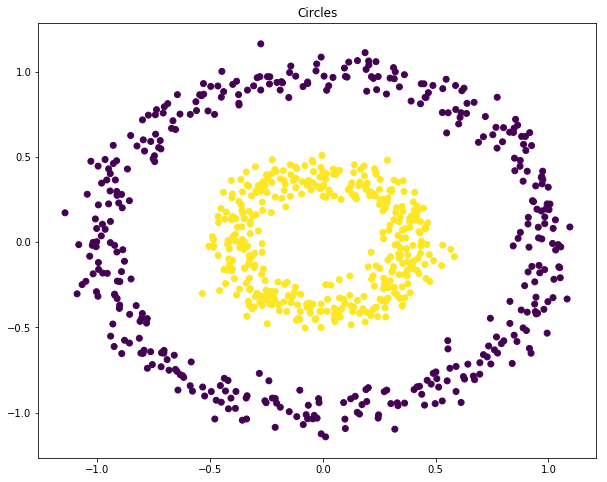

In [213]:
from sklearn.datasets import make_circles

X, T = make_circles(n_samples=800, noise=0.07, factor=0.4)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=T)
plt.title("Circles")



In [239]:
obj= NeuralNetLogReg([2, 4, 2],1)
obj.train(X, T)
# checking the training error only
classes = obj.use(X)

In [241]:
classes[classes==1]=1
classes[classes==-1]=0

Accuracy:  100.0 %


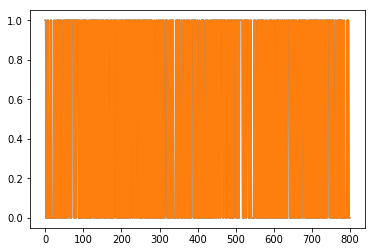

In [242]:
plt.plot(T)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(T - classes)) * 100, "%")

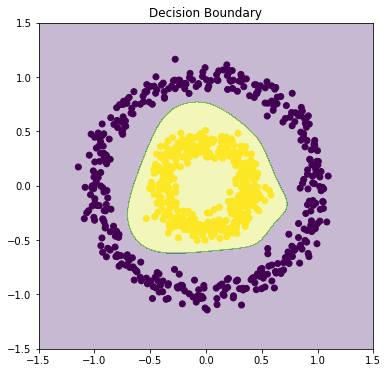

In [243]:
# show me the boundary

x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5, 1.5, 1000)

xs, ys = np.meshgrid(x, y)

Xt = np.vstack((xs.flat, ys.flat)).T
classes= obj.use(Xt)
np.unique(classes)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape), alpha=0.3)
plt.title("Decision Boundary")

plt.scatter(X[:, 0], X[:, 1], marker='o', c=T+3)

#  Partitioning dataset

In [244]:
cols=['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']
X=result_dfbank[cols]
y=result_dfbank['y']
X=X.values
y=y.values

# Cross Validation  codes and explanation

we want a model that have good generalization. The idea is preparing one dataset (a validation set) by pretending that we cannot see the labels. After choosing a model parameter (or a model) and train it with training dataset, we test it on the validation data. 
Comparing the validation error, we select the one that has the lowest validation error. Finally, we evaluate the model on testing data. 

Here follows the K-fold cross-validation that divides the data into K blocks for traing, validating and testing.

### K-fold CV Procedure


>  Choose K for K-fold cross validation.

>  Set nfold = 0. 

>  Initialize the lists *res* = [], *testErrs* = [].

>  Split data X and label T into K number of partitions.

>  For each TEST partition 

>>  For each validation partition among the rest partitions 

>>>  Choose the rest partitions into a training set.

>>>  For each set __P__ of parameters to test

>>>>   Using __P__, train the model 

>>>>   Use the trained model on the validation data

>>>>   Evaluate the validation result and store the restuls to *res*

>>  From the *res* result, pick the one with the best result.

>>  Retrain the model with the best parameter __p__ in __P__.

>>  Apply the model with the best parameter __p*__ to the test dataset. 

>>  Evaluate the result *err* and store the tuple (__p*__, *err*) to *testErrs*. 

>  Return *testErrs*. 


Here I am creating a partition function which will give you the validation set and training set for a particulat fold 
and dataset.
it will accept the dataset(without target column) and its target output column. It will calculate the start and end index of dataset
and it will merge the other portion in the datasets together and it will return the 
validation set , validation target set , train set and train set target

In [247]:
def partition(trainX,trainY,fold, k):
    size = trainX.shape[0]
    start = (int)(size/k)*fold
    end = (int)(size/k)*(fold+1)
    #print("start",start,"end",end)
    validationX = trainX[start:end]
    validationY = trainY[start:end]
    trainingX = np.concatenate((trainX[:start], trainX[end:]))
    trainingY = np.concatenate((trainY[:start], trainY[end:]))
    return validationX,trainingX,validationY,trainingY

Following code execution is like for each combination of parameters (no of neurons in each layer, lambda, learning rate) it wll
compute the accuracy using 5 fold cross validation. At the end we will take the combination of parameters with maximum accuracy. For each fold it will call the partition function and store the accuracy of the that particular fold. At the end of the for loop we will take the average of the accuracy of the folds and that will be accuracy of a particular combination of parameters

In [ ]:
kfold=5
for nNeuron in (5,10,15):
    for lambdaC in (0.0,0.5,0.9):
        for lrate in (1,5,10):
            accuracy=[]
            for fold in range(0,kfold):
            #print("fold",fold)
                valX,trainX,valY,trainY=partition(X,y,fold,kfold)
                obj= NeuralNetLogReg([61,nNeuron, 2],lrate/10)
                obj.train(trainX,trainY,optim='scg',Lambda=lambdaC)
                result=obj.use(valX)
                acc=np.sum(result==valY)/valY.shape[0]
                accuracy.append(acc)
            print("no of neurons=",nNeuron," lambda=",lambdaC, " learning rate=",lrate/10," accuracy=", np.average(accuracy))

In [1]:
# Result copied from the execution in Discussions about parameter/network structure choice

In [ ]:
no of neurons= 5  lambda= 0.0  learning rate= 0.1  accuracy= 0.8857108170450407
no of neurons= 5  lambda= 0.0  learning rate= 0.5  accuracy= 0.8344300109263081
no of neurons= 5  lambda= 0.0  learning rate= 1.0  accuracy= 0.8855651329367488
no of neurons= 5  lambda= 0.5  learning rate= 0.1  accuracy= 0.8859536238921937
no of neurons= 5  lambda= 0.5  learning rate= 0.5  accuracy= 0.8859536238921937
no of neurons= 5  lambda= 0.5  learning rate= 1.0  accuracy= 0.8873619036056816
no of neurons= 5  lambda= 0.9  learning rate= 0.1  accuracy= 0.8859536238921937
no of neurons= 5  lambda= 0.9  learning rate= 0.5  accuracy= 0.8859536238921937
no of neurons= 5  lambda= 0.9  learning rate= 1.0  accuracy= 0.8873619036056816
no of neurons= 10  lambda= 0.0  learning rate= 0.1  accuracy= 0.8665776374893772
no of neurons= 10  lambda= 0.0  learning rate= 0.5  accuracy= 0.8635911132693941
no of neurons= 10  lambda= 0.0  learning rate= 1.0  accuracy= 0.8448464246691756
no of neurons= 10  lambda= 0.5  learning rate= 0.1  accuracy= 0.8873619036056816
no of neurons= 10  lambda= 0.5  learning rate= 0.5  accuracy= 0.8859536238921937
no of neurons= 10  lambda= 0.5  learning rate= 1.0  accuracy= 0.8873619036056816
no of neurons= 10  lambda= 0.9  learning rate= 0.1  accuracy= 0.8859536238921937
no of neurons= 10  lambda= 0.9  learning rate= 0.5  accuracy= 0.8873619036056816
no of neurons= 10  lambda= 0.9  learning rate= 1.0  accuracy= 0.8859536238921937
no of neurons= 15  lambda= 0.0  learning rate= 0.1  accuracy= 0.8601675367245356
no of neurons= 15  lambda= 0.0  learning rate= 0.5  accuracy= 0.861600097122739
no of neurons= 15  lambda= 0.0  learning rate= 1.0  accuracy= 0.877722471773704
no of neurons= 15  lambda= 0.5  learning rate= 0.1  accuracy= 0.8859536238921937
no of neurons= 15  lambda= 0.5  learning rate= 0.5  accuracy= 0.8859536238921937
no of neurons= 15  lambda= 0.5  learning rate= 1.0  accuracy= 0.8859536238921937
no of neurons= 15  lambda= 0.9  learning rate= 0.1  accuracy= 0.8873619036056816
no of neurons= 15  lambda= 0.9  learning rate= 0.5  accuracy= 0.8873619036056816
no of neurons= 15  lambda= 0.9  learning rate= 1.0  accuracy= 0.8859536238921937

# IV - Results

- Pick one of classifieres in Assignment #2 and compare with Nonlinear Logistic Regression.
- Presents the results of applications of thw two classifiers.
- Visualize the results 
- Discuss about the choice of parameters for each model 
- What do you think about the results? 

# plots for results (10 pts for each classifier)

# 1.QDA

When we have a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid \xv)$ for the sample $\xv$ with the positive label. Thus, 

$$
P(T = +1 \mid \xv) > P(T = -1 \mid \xv).
$$

The inequality will be the opposite in case of the negative samples. 

By deriving, we can define the discriminant function $\delta_k(\xv)$ as

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{\xv}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

Since the $\delta_k$ function is quadratic in $\xv$, the decision boundary is quadratic. 
We call this approach as **Quadratic Discriminant Analysis (QDA)**. 

Base Model is the parent class here, which has two abstract method train and use. Classifier inherits the Base Model and it has Method like __init__ for initializing the variables, normalize for normalizing the train and test data, add_ones is used to add basis to features.

In [256]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None
        self.w = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = X-self.meanX/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

Class QDA is used to implement QDA algorithm. It has __init__, QDAFun, train and use method. __init__ used to initialize the Variables and train method will find mea, sigma, prior for each label. Use method uses the QDAFun method to the indicator of the probability Of each record set of test data for each label. Using argmax method I am returning the predicted label by taking the largest value from d1 and d2

In [257]:
from copy import deepcopy as copy
class QDA(Classifier): 
   
    
    def __init__(self):
        Classifier.__init__(self)
        self.Xs=None
        self.mu1=None
        self.mu2=None
        self.Sigma1=None
        self.Sigma2=None
        self.N=None
        self.N1=None
        self.N2=None
        self.prior1=None
        self.prior2=None
        self.d11=None
        self.d22=None
    
    
    
    
    def QDAFun(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
    
        
    
    def train(self, X, T):
        self.meanX, self.stdX = np.mean(X, 0), np.std(X, 0)
        self.Xs = (X - self.meanX) / self.stdX
        self.mu1=np.mean(self.Xs[T==1],0)
        self.mu2=np.mean(self.Xs[T==-1],0)
        self.Sigma1 = np.cov(self.Xs[T==1].T)
        self.Sigma2 = np.cov(self.Xs[T==-1].T)
        self.N=self.Xs.shape[0]
        self.N1=self.Xs[T==1].shape[0]
        self.N2=self.Xs[T==-1].shape[0]
        self.prior1 = self.N1 /self.N
        self.prior2 = self.N2 /self.N
  
 
    def use(self, X):
        self.XtestS = (X-self.meanX)/self.stdX
        d1 = self.QDAFun(self.XtestS, self.mu1, self.Sigma1, self.prior1)
        d2 = self.QDAFun(self.XtestS, self.mu2, self.Sigma2, self.prior2) 
        self.d11=d1
        self.d22=d2
        #print(d1)
        #print(d2)
       # d=np.vstack((d1,d2)).T
        d=np.column_stack((d1,d2))
        print(d.shape)
                          
        dargmax=np.argmax(d,axis=1)
        print(dargmax)
        print(np.unique(dargmax))
        dargmax[dargmax==1]=-1
        dargmax[dargmax==0]=1
        
        print(np.unique(dargmax))
        #print(d)
        return dargmax
        

Partitioning data

In [259]:
qdaobj = QDA()
#nXLs=ls.add_ones(nX)
qdaobj.train(X_train,y_train)
#plt.plot(Tlog, 'ob')
yqda=qdaobj.use(X_test)
np.unique(yqda)

(8238, 2)
[0 0 1 ... 0 1 0]
[0 1]
[-1  1]


array([-1,  1], dtype=int64)

In [260]:
def accuracy(actual,predicted):
    return (np.sum(actual==predicted))/predicted.shape[0]

In [262]:
accuracy(y_test,yqda)

0.6139839766933721

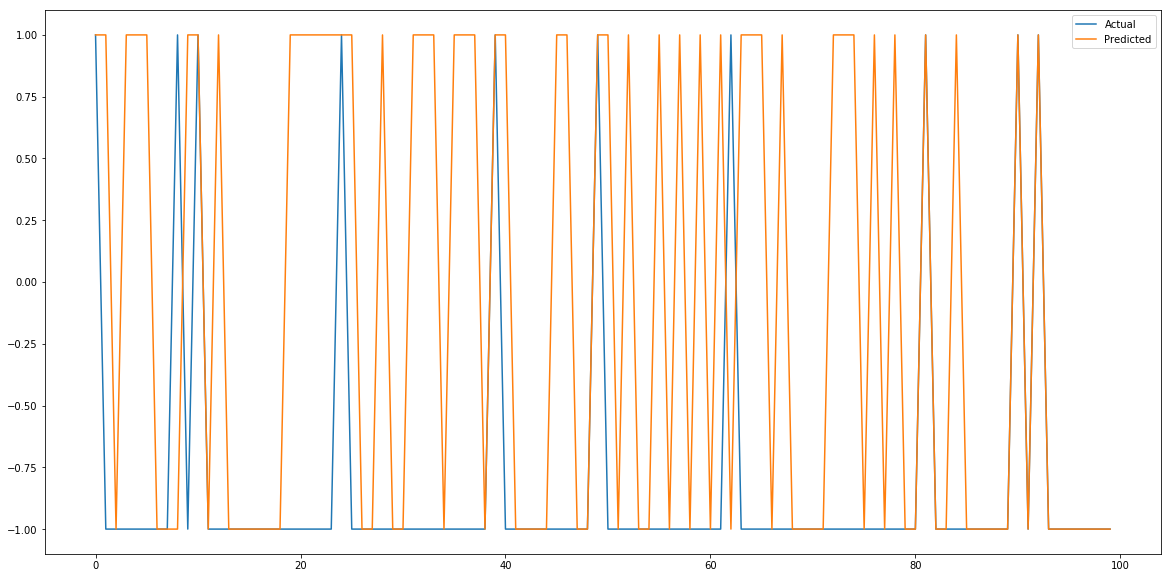

In [263]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[:100], label='Actual')
plt.plot(yqda[:100], label='Predicted')
plt.legend()
plt.show()

# 2. Neural Network

In [282]:
obj= NeuralNetLogReg([61, 10, 2],1)
obj.train(X_train, y_train)
classes = obj.use(X_test)

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in multiply


In [267]:
accuracy(y_test,classes)

0.9085943190094683

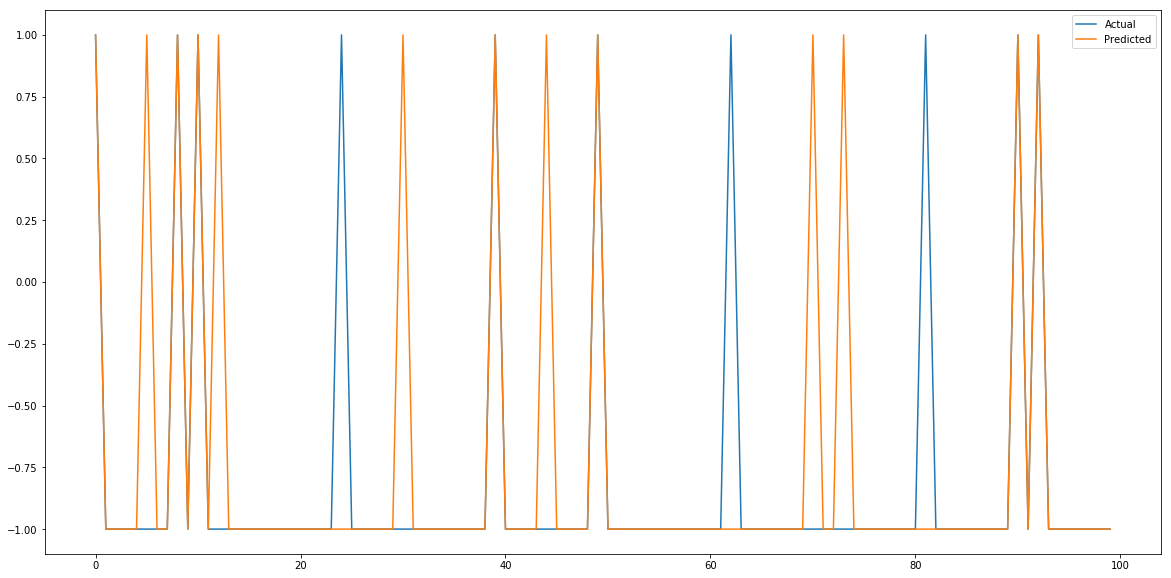

In [268]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[:100], label='Actual')
plt.plot(classes[:100], label='Predicted')
plt.legend()
plt.show()

# 	Discussions about parameter/network structure choice

Here I am creating a partition function which will give you the validation set and training set for a particulat fold 
and dataset.
it will accept the dataset(without target column) and its target output column. It will calculate the start and end index of dataset
and it will merge the other portion in the datasets together and it will return the 
validation set , validation target set , train set and train set target

In [283]:
def partition(trainX,trainY,fold, k):
    size = trainX.shape[0]
    start = (int)(size/k)*fold
    end = (int)(size/k)*(fold+1)
    #print("start",start,"end",end)
    validationX = trainX[start:end]
    validationY = trainY[start:end]
    trainingX = np.concatenate((trainX[:start], trainX[end:]))
    trainingY = np.concatenate((trainY[:start], trainY[end:]))
    return validationX,trainingX,validationY,trainingY

Following code execution is like for each combination of parameters (no of neurons in each layer, lambda, learning rate) it wll
compute the accuracy using 5 fold cross validation. At the end we will take the combination of parameters with maximum accuracy. For each fold it will call the partition function and store the accuracy of the that particular fold. At the end of the for loop we will take the average of the accuracy of the folds and that will be accuracy of a particular combination of parameters

In [284]:
kfold=5
for nNeuron in (5,10,15):
    for lambdaC in (0.0,0.5,0.9):
        for lrate in (1,5,10):
            accuracy=[]
            for fold in range(0,kfold):
            #print("fold",fold)
                valX,trainX,valY,trainY=partition(X,y,fold,kfold)
                obj= NeuralNetLogReg([61,nNeuron,2],lrate/10)
                obj.train(trainX,trainY,optim='scg',Lambda=lambdaC)
                result=obj.use(valX)
                acc=np.sum(result==valY)/valY.shape[0]
                accuracy.append(acc)
            print("no of neurons=",nNeuron," lambda=",lambdaC, " learning rate=",lrate/10," accuracy=", np.average(accuracy))

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in multiply
C:\NCC\SecondSemester\ML\Homework\Assignment4 Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\NCC\SecondSemester\ML\Homework\Assignment4 Neural Network\util.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return (X - self._mu) / self._sigma


no of neurons= 5  lambda= 0.0  learning rate= 0.1  accuracy= 0.8857108170450407
no of neurons= 5  lambda= 0.0  learning rate= 0.5  accuracy= 0.8344300109263081
no of neurons= 5  lambda= 0.0  learning rate= 1.0  accuracy= 0.8855651329367488
no of neurons= 5  lambda= 0.5  learning rate= 0.1  accuracy= 0.8859536238921937
no of neurons= 5  lambda= 0.5  learning rate= 0.5  accuracy= 0.8859536238921937
no of neurons= 5  lambda= 0.5  learning rate= 1.0  accuracy= 0.8873619036056816
no of neurons= 5  lambda= 0.9  learning rate= 0.1  accuracy= 0.8859536238921937
no of neurons= 5  lambda= 0.9  learning rate= 0.5  accuracy= 0.8859536238921937
no of neurons= 5  lambda= 0.9  learning rate= 1.0  accuracy= 0.8873619036056816
no of neurons= 10  lambda= 0.0  learning rate= 0.1  accuracy= 0.8665776374893772
no of neurons= 10  lambda= 0.0  learning rate= 0.5  accuracy= 0.8635911132693941
no of neurons= 10  lambda= 0.0  learning rate= 1.0  accuracy= 0.8448464246691756
no of neurons= 10  lambda= 0.5  learn

We will take the parameters which gives more accuracy

From the above result it seems the best parameter combination are 
no of neurons= 15  lambda= 0.9  learning rate= 0.5  accuracy= 0.8873619036056816
no of neurons= 5  lambda= 0.9  learning rate= 1.0  accuracy= 0.8873619036056816
no of neurons= 10  lambda= 0.5  learning rate= 0.1  accuracy= 0.8873619036056816
no of neurons= 10  lambda= 0.9  learning rate= 0.5  accuracy= 0.8873619036056816
no of neurons= 15  lambda= 0.9  learning rate= 0.1  accuracy= 0.8873619036056816
no of neurons= 15  lambda= 0.9  learning rate= 0.5  accuracy= 0.8873619036056816

I am choosing the no of neurons= 5  lambda= 0.9  learning rate= 1.0  accuracy= 0.8873619036056816 as the best parameter
accuarcy is 88.7%

# Discussions about classificaion model comparison

here I am used QDA and neural network for classification. From the accuracy which we calcualted below, It seems neural network gives  more accuracy than Classification based on QDA

Accuracy of QDA

In [269]:
accuracy(y_test,yqda)

0.6139839766933721

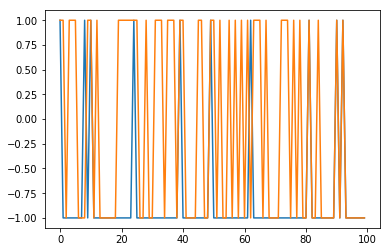

In [277]:

plt.plot(y_test[:100])
plt.plot(yqda[:100])


Accuracy of Neural Network

In [270]:
accuracy(y_test,classes)

0.9085943190094683

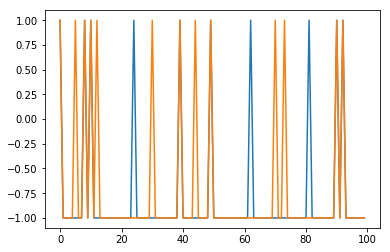

In [278]:
plt.plot(y_test[:100])
plt.plot(classes[:100])

# Discussion about the classification results. Try to analyze what nonlinear logistic regression learned.

From the above result we can see that the non linear logistic regression outperform the linear logistic regression.
Accuracy of QDA was 61% and Neural network is above 88%. 
We can improve the result by building more deeper neural network. Since we have set of neurons in hidden layer,importance of each input feature taken care by the these neurons. So we get better classification model in non linear logistic regression

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

I learned how to use the neural network for classification problems. It was a great experience because I have to understand the code which are given as well as I have to develop new code also. 

# Extra Credit

One extra credit is assigned when finish the following bullets. 

- Try nonlinear regression with neural networks and compare with linear regression model 
- Use cross validation to discover the best model and compare models. 

# TO START

- download [a4.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a4.tgz). 
- import the necessary classes or functions including NeuralNet.
- inherit NeuralNet and make NeuralNetLogReg

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 | 5| Summary of Neural Networks
 | 5| Summary of Nonlinear Logistic Regression
 | 5| Explanation of codes
 |10| Examination of correct implementation with preliminary test with *explanation (5 pts)*
 |20| Cross validation codes and explanation 
35 | Results | Your Data
| 20| plots for results (10 pts for each classifier)
| 5| Discussions about parameter/network structure choice 
| 5| Discussions about classificaion model comparison
| 5| Discussion about the classification results. Try to analyze what nonlinear logistic regression learned. 
5 | Conclusions 
